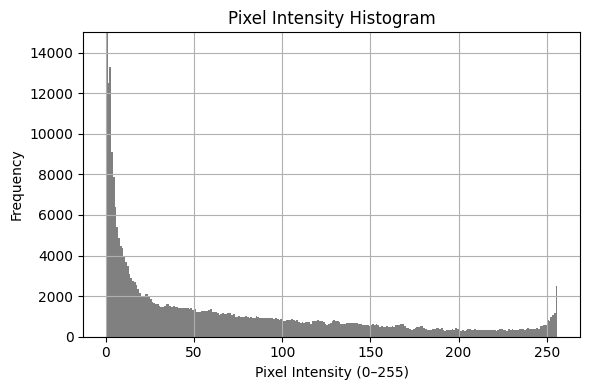

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the grayscale image
img = Image.open('/kaggle/input/processed-data/data/encoder_training/frame_000000.png')

# Convert to NumPy array
img_array = np.array(img)

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(img_array.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Pixel Intensity Histogram")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.ylim(0, 15000)
plt.grid(True)
plt.tight_layout()
plt.show()


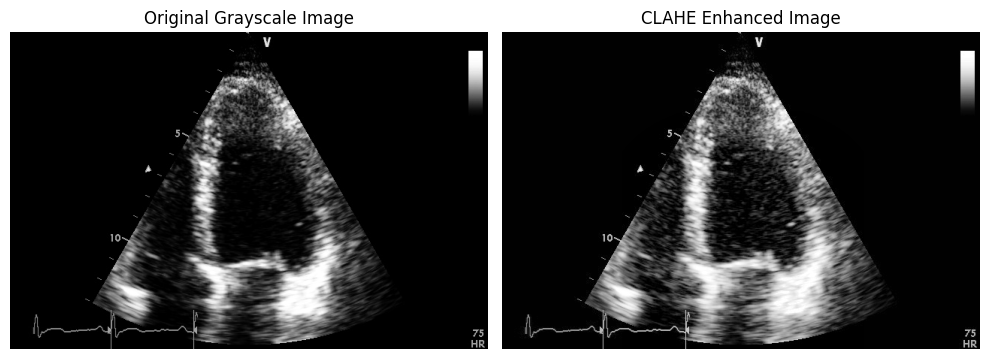

In [14]:
import cv2
from matplotlib import pyplot as plt

# Read the grayscale image
img = cv2.imread('/kaggle/input/processed-data/data/encoder_training/frame_000000.png', cv2.IMREAD_GRAYSCALE)

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4, 4))

# Apply CLAHE
clahe_img = clahe.apply(img)

# Display original and CLAHE images side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

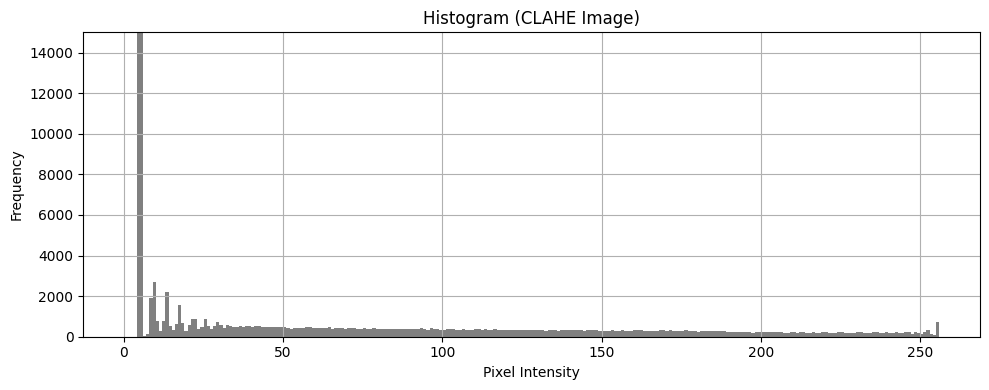

In [16]:
import cv2
from matplotlib import pyplot as plt

# Read the grayscale image
img = cv2.imread('/kaggle/input/processed-data/data/encoder_training/frame_000000.png', cv2.IMREAD_GRAYSCALE)

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4, 4))

# Apply CLAHE
clahe_img = clahe.apply(img)

# Plot original image, CLAHE image, and histogram
plt.figure(figsize=(10,4))

# Original image
# plt.subplot(1, 2,1)
# plt.hist(img_array.ravel(), bins=256, range=[0, 256], color='gray')
# plt.title("Pixel Intensity Histogram")
# plt.xlabel("Pixel Intensity (0–255)")
# plt.ylabel("Frequency")
# plt.ylim(0, 15000)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# Histogram of CLAHE-enhanced image
# plt.subplot(1, 2, 2)
plt.hist(clahe_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram (CLAHE Image)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.ylim(0, 15000)
plt.grid(True)
plt.tight_layout()
plt.show()


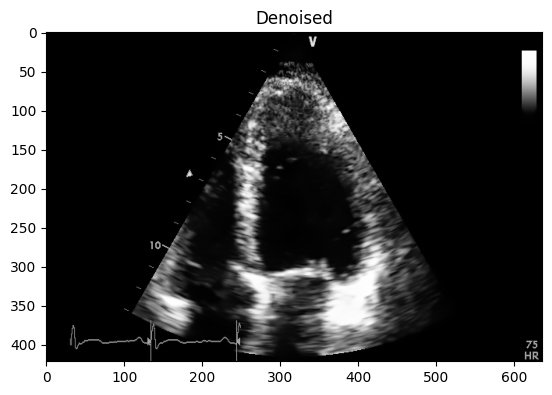

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale ultrasound image
img = cv2.imread('/kaggle/input/processed-data/data/encoder_training/frame_000000.png', cv2.IMREAD_GRAYSCALE)

# Apply Non-Local Means Denoising
denoised = cv2.fastNlMeansDenoising(img, None, h=10, templateWindowSize=7, searchWindowSize=21)
plt.imshow(denoised, cmap='gray'); plt.title("Denoised")
plt.show()


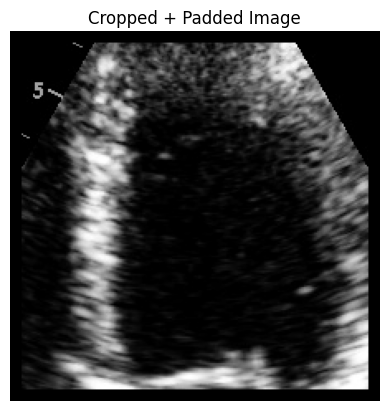

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

def crop_and_pad(img, crop_size=(210, 210), final_size=(224, 224)):
    """
    Crop the center of the image to crop_size and pad back to final_size.
    
    Args:
        img: Input grayscale image (256x256 expected).
        crop_size: Size to crop (width, height).
        final_size: Size to pad back to (width, height).
    
    Returns:
        Padded image.
    """
    h, w = img.shape
    crop_w, crop_h = crop_size
    final_w, final_h = final_size

    # Crop center
    start_x = (w - crop_w) // 2
    start_y = (h - crop_h) // 2
    cropped = img[start_y:start_y+crop_h, start_x:start_x+crop_w]

    # Pad with black (zeros)
    padded = np.zeros((final_h, final_w), dtype=np.uint8)
    pad_x = (final_w - crop_w) // 2
    pad_y = (final_h - crop_h) // 2
    padded[pad_y:pad_y+crop_h, pad_x:pad_x+crop_w] = cropped

    return padded

# Load image
img = cv2.imread('/kaggle/input/processed-data/data/encoder_training/frame_000000.png', cv2.IMREAD_GRAYSCALE)
result = crop_and_pad(img)

plt.imshow(result, cmap='gray')
plt.title('Cropped + Padded Image')
plt.axis('off')
plt.show()


Image shape: (422, 636)


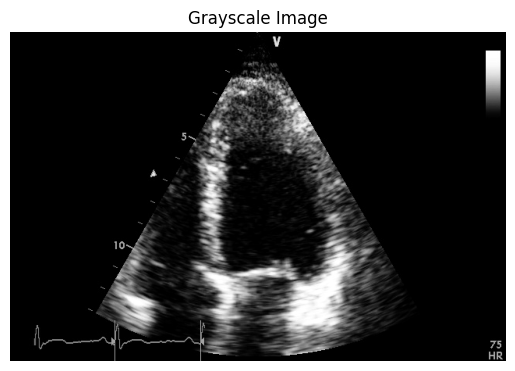

In [10]:
import cv2
import matplotlib.pyplot as plt

# Path to your grayscale image
image_path = '/kaggle/input/processed-data/data/encoder_training/frame_000000.png'
# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print("Image shape:", img.shape)
# Display using matplotlib
plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

IMG_HEIGHT = 256
IMG_WIDTH = 256
def load_and_resize(path, size=(IMG_HEIGHT, IMG_WIDTH)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)
    img = img.astype('float32') / 255.0
    return np.expand_dims(img, axis=-1)  # (256, 256, 1)



def crop_and_pad_top_left(img, crop_size=(100, 100), final_size=(256, 256)):
    """
    Crop the top-left of the image to crop_size and pad back to final_size.
    
    Args:
        img: Input grayscale image (256x256 expected).
        crop_size: Size to crop (width, height).
        final_size: Size to pad back to (width, height).
    
    Returns:
        Padded image.
    """
    crop_w, crop_h = crop_size
    final_w, final_h = final_size

    # Crop top-left corner
    cropped = img[:crop_h, :crop_w]

    # Pad with black (zeros)
    padded = np.zeros((final_h, final_w), dtype=np.uint8)
    pad_x = (final_w - crop_w) // 2
    pad_y = (final_h - crop_h) // 2
    padded[pad_y:pad_y+crop_h, pad_x:pad_x+crop_w] = cropped

    return padded


# Sanity check
sample_img = load_and_resize('/kaggle/input/processed-data/data/encoder_training/frame_000000.png')
print("Image shape:", sample_img.shape)
sample_img = np.squeeze(sample_img, axis=-1)
# Load image
sample_img = cv2.imread('sample_img', cv2.IMREAD_GRAYSCALE)
result = crop_and_pad(sample_img)

plt.imshow(result, cmap='gray')
plt.title('Cropped + Padded Image')
plt.axis('off')
plt.show()




In [2]:
import torch
import tensorflow as tf

device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print(device)
# Optional: Force GPU/CPU usage
if tf.config.list_physical_devices('GPU'):
    device = '/GPU:0'
    print("Using GPU")
else:
    device = '/CPU:0'
    print("Using CPU")


2025-05-04 21:15:47.877857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746393348.119249      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746393348.193882      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


cuda
Using GPU


In [3]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 16

# Set paths
image_dir = '/kaggle/input/final-data/data1/encoder_directory_new'
mask_dir = '/kaggle/input/final-data/data1/decoder_directory_new'

# Load all image and mask file paths
image_paths = sorted([os.path.join(image_dir, fname) for fname in os.listdir(image_dir)])
mask_paths = sorted([os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)])

def load_and_resize(path, size=(IMG_HEIGHT, IMG_WIDTH)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = img.astype('float32') / 255.0
    return np.expand_dims(img, axis=-1)  # (224, 224, 1)

# Sanity check
sample_img = load_and_resize(image_paths[0])
print("Image shape:", sample_img.shape)


train_imgs, temp_imgs, train_masks, temp_masks = train_test_split(
    image_paths, mask_paths, test_size=0.30, random_state=42)

val_imgs, test_imgs, val_masks, test_masks = train_test_split(
    temp_imgs, temp_masks, test_size=0.50, random_state=42)


class DataGenerator(Sequence):
    def __init__(self, img_paths, mask_paths, batch_size=BATCH_SIZE, img_size=(IMG_HEIGHT, IMG_WIDTH)):
        self.img_paths = img_paths
        self.mask_paths = mask_paths
        self.batch_size = batch_size
        self.img_size = img_size

    def __len__(self):
        return int(np.ceil(len(self.img_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_imgs = self.img_paths[index*self.batch_size:(index+1)*self.batch_size]
        batch_masks = self.mask_paths[index*self.batch_size:(index+1)*self.batch_size]

        X = np.zeros((len(batch_imgs), *self.img_size, 1), dtype=np.float32)
        y = np.zeros((len(batch_masks), *self.img_size, 1), dtype=np.float32)

        for i, (img_path, mask_path) in enumerate(zip(batch_imgs, batch_masks)):
            X[i] = load_and_resize(img_path)
            y[i] = load_and_resize(mask_path)
            y[i] = (y[i] > 0).astype(np.float32)  # Binarize mask

        return X, y


train_gen = DataGenerator(train_imgs, train_masks)
# train_gen.to(device)
val_gen = DataGenerator(val_imgs, val_masks)
test_gen = DataGenerator(test_imgs, test_masks)

Image shape: (224, 224, 1)


In [4]:
from tensorflow.keras.models import Model, load_model
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
from tensorflow.keras import layers, optimizers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize



def resblock(X, f):


  # make a copy of input
  X_copy = X

  # main path
  # Read more about he_normal: https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528

  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X)

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)

  # Short path
  # Read more here: https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

  # Adding the output from main path and short path together

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

input_shape = (224,224,1)

# Input tensor shape
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )
model_seg.summary()

I0000 00:00:1746393445.757363      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 16)   │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 224, 224, 16)   │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 224, 224, 16)   │          2,320 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 224, 224, 16)   │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 112, 112, 16)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 112, 112, 32)   │            544 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 112, 112, 32)   │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 112, 112, 32)   │          9,248 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 112, 112, 32)   │            544 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 112, 112, 32)   │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 112, 112, 32)   │            128 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 112, 112, 32)   │              0 │ batch_normalization_3… │
│                           │                        │                │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 112, 112, 32)   │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 56, 56, 32)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)       

 Total params: 1,210,225 (4.62 MB)

 Trainable params: 1,205,841 (4.60 MB)

 Non-trainable params: 4,384 (17.12 KB)

In [5]:
def tversky(y_true, y_pred, smooth = 1e-6):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

def focal_tversky(y_true,y_pred):
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)
    
adam = tf.keras.optimizers.Adam(learning_rate = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])
with tf.device(device):
    model_seg.fit(train_gen,epochs=EPOCHS)
    
model_json = model_seg.to_json()
with open("ResUNet-model.json","w") as json_file:
  json_file.write(model_json)

Epoch 1/16


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746393494.802621      92 service.cc:148] XLA service 0x7b2f48004e80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746393494.803654      92 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746393497.024344      92 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746393510.922262      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


78/78 ━━━━━━━━━━━━━━━━━━━━ 75s 431ms/step - loss: 0.8338 - tversky: 0.2146
Epoch 2/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 0.5491 - tversky: 0.5463
Epoch 3/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.2452 - tversky: 0.8462
Epoch 4/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.1766 - tversky: 0.9009
Epoch 5/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.1535 - tversky: 0.9179
Epoch 6/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.1409 - tversky: 0.9267
Epoch 7/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 0.1311 - tversky: 0.9337
Epoch 8/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.1254 - tversky: 0.9375
Epoch 9/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.1184 - tversky: 0.9418
Epoch 10/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.1172 - tversky: 0.9429
Epoch 11/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.1108 - tversky: 0.9468
Epoch 12/16
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0

In [ ]:
with open('/kaggle/working/ResUNet-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

def prediction(test, model, model_seg):
  #directory
  directory = "./"

  #Creating empty list to store the results
  mask = []
  image_id = []
  has_mask = []

  #iterating through each image in the test data
  for i in test.image_path:

    path = directory + str(i)

    #reading the image
    img = io.imread(path)

    #Normalizing the image
    img = img * 1./255.

    #Reshaping the image
    # img = cv2.resize(img,(256,256))

    #Converting the image into array
    img = np.array(img, dtype = np.float64)
    
    #reshaping the image from 224,224,1 to 1,224,224,1
    img = np.reshape(img, (1,224,224,1))

    #making prediction on the image
    is_defect = model.predict(img)

    #if tumour is not present we append the details of the image to the list
    if np.argmax(is_defect) == 0:
      image_id.append(i)
      has_mask.append(0)
      mask.append('No mask')
      continue

    #Read the image
    img = io.imread(path)

    #Creating a empty array of shape 1,256,256,1
    X = np.empty((1, 256, 256, 3))

    #resizing the image and coverting them to array of type float64
    img = cv2.resize(img,(256,256))
    img = np.array(img, dtype = np.float64)

    #standardising the image
    img -= img.mean()
    img /= img.std()

    #converting the shape of image from 256,256,3 to 1,256,256,3
    X[0,] = img

    #make prediction
    predict = model_seg.predict(X)

    #if the sum of predicted values is equal to 0 then there is no tumour
    if predict.round().astype(int).sum() == 0:
        image_id.append(i)
        has_mask.append(0)
        mask.append('No mask')
    else:
    #if the sum of pixel values are more than 0, then there is tumour
        image_id.append(i)
        has_mask.append(1)
        mask.append(predict)

  return image_id, mask, has_mask

image_id, mask, has_mask = prediction(test, model, model_seg)